In [ ]:
import pandas as pd
from mplfinance.original_flavor import candlestick_ohlc
import numpy as np
import matplotlib
4
import matplotlib
matplotlib.use('Agg') # Bypass the need to install Tkinter GUI framework
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import time
import datetime
import requests
import json

from dotenv import dotenv_values
import sys
import os

# Avoid FutureWarning: Pandas will require you to explicitly register matplotlib converters.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
class Grafico():
    
    def __init__(self, currence, tipo='velas'):
        
        ahora = int(time.time())
        if tipo == 'velas':
            inicio = ahora - 86400
            
        elif tipo == '7dias':
            inicio = ahora - (7*86400)
            
        datos = self.leer_data(inicio, ahora, currence)
        
        if datos:
            dproc = self.proc_dat(datos, tipo)
            self.plot_graf(dproc, currence, tipo)
            
    def leer_data(self, inicio, ahora, currence):
        
        params = (
            ('command', 'returnChartData'),
            ('currencyPair', currence),
            ('start', str(inicio)),
            ('end', str(ahora)),
            ('period', '1800'),
        )

        try:
            response = requests.get('https://poloniex.com/public', params=params)
            return response.json()

        except:
            return None
    
    
    def proc_dat(self, datos, tipo):
        
        resultado = pd.DataFrame.from_dict(datos, dtype = np.float64)
        
        if tipo == 'velas':
            resultado['tiempo'] = pd.to_datetime(resultado['date']//1, unit='s')
            resultado['date'] = [mdates.date2num(d) for d in resultado['tiempo']]
            quotes = [tuple(x) for x in resultado[['date','open','high','low','close']].values]
            
            return quotes
        
        elif tipo == '7dias':
            resultado['date'] = resultado['date'].apply(lambda x:  datetime.datetime.fromtimestamp(x))
            resultado['Last_suav_exp'] = resultado['close'].ewm(span=10,adjust=False).mean()
            
            return resultado
    
    def plot_graf(self, dproc, currence, tipo):
        
        fig, ax = plt.subplots()
        ax.grid(b='on', color='k', linewidth=.5, alpha=0.3)
        
        if tipo == 'velas':
            
            candlestick_ohlc(ax, dproc, width=0.007, colorup='g', colordown='r',  alpha=1.0)

            plt.title(currence)

            ax.xaxis_date()
            
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%y/%m/%d-%H:%M'))
            
            plt.setp(ax.get_xticklabels(), size = 8)
            
            plt.gcf().autofmt_xdate()
            plt.autoscale(tight=True)

        
        elif tipo == '7dias':
            
            x = list(dproc['date'].values)
            y = list(dproc['close'].values)
            z = list(dproc['Last_suav_exp'].values)

            fig, ax = plt.subplots()
            ax.grid(b='on', color='g', linewidth=.5)

            plt.title('{} actualizacion aprox 2 min: {:.2f}'.format(currence, y[-1]))

            ax.xaxis_date()
            
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
            
            plt.setp(ax.get_xticklabels(), size = 8)
            plt.xticks(rotation=45)
            ax.plot(x, y, x, z)
        
        dir_output = currences_pairs[currence].split(';')[1]
        nom_file = '{}_{}'.format(tipo, currence)
        plt.savefig(os.path.join(dir_output, nom_file))

In [1]:
import pandas as pd
from datetime import datetime


In [ ]:
frame_graf = pd.read_pickle('../../simultrade/static/datos_graf.pkl')
print(frame_graf.shape)
frame_graf.tail()

In [ ]:
frame_graf.head()

In [ ]:
tiempo_inicio = frame_graf.iloc[0]['X_fec']
print(tiempo_inicio)


In [ ]:
frame_vals = pd.read_pickle('../../simultrade/static/df_datos.pkl')
frame_vals.shape

In [ ]:
valores = frame_vals.loc[frame_vals['date']>=tiempo_inicio]

In [ ]:
frame_vals.tail()

In [ ]:
valores.shape

In [ ]:
def match(j, sxf):
    matchind = 0
    try:
        for i in range(1 + j -1, len(puntos_locat)):
            if abs(sxf - puntos_locat[i]) < abs(sxf - puntos_locat[i - 1]):
                matchind = puntos_locat[i]
            else:
                break
        return i -1
    except:
        pass

X_fec = frame_graf.X_fec
Y_pru = [y for y in frame_graf.Y_pru]
mae_res = frame_graf.mae_res





In [ ]:

# aqui se toman los puntos y su respectiva ubicacion
puntos_locat = [datetime.timestamp(z) for z in valores['date']]
puntos = [z for z in valores['close']]

In [ ]:


puntos_locat


In [ ]:
# ahora hay que pasar X_fec a formato timestamp
# para ubicar los puntos en el eje x 

j = 0
puntos_x = []
for xf in X_fec:
    stam_xf = datetime.timestamp(xf)
    puntos_x.append(match(j, stam_xf))
    j += 1
    if j == len(puntos_locat):
        break

In [ ]:
for xf in X_fec:
    print(xf, datetime.timestamp(xf))

In [ ]:
x_ftks = [str(xf)[5:16] for xf in X_fec]
        

In [ ]:
puntos_x

In [ ]:
#def __plot_eval(self, X_fec, Y_pru, puntos, mae_res, len_valores, puntos_x):

import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

len_valores = len(valores)
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(len(X_fec)), Y_pru, color='red', linewidth=2)

y_ = [y[0] for y in Y_pru]
y1 = [a + 2 * b for a, b in zip(y_, mae_res)] 

y2 = [a - 2 * b for a, b in zip(y_, mae_res)] 


# eval
i = 0
for a, b, c in zip(y1, y2, puntos):
    if c >= b and c <= a:
        i += 1
# plt.title('Evalue Model')

if len_valores > 10:
    y_estm = y_
    y_real = puntos[:len(y_)]
    #print(f'y_estm: {len(y_estm)}, puntos: {len(puntos)}')

    mae = metrics.mean_absolute_error(y_real, y_estm)
    plt.title('Prediction to {} - Mean Absolute Error = {} '.format('hola', round( mae, 2))) 

# # Shade the area between y1 and y2
plt.fill_between(X_fec, y1, X_fec,y2,
                 facecolor="orange", # The fill color
                 color='blue',       # The outline color
                 alpha=0.2)          # Transparency of the fill

plt.grid(b='on', color='g', linewidth=.5)

ax.xaxis.set_ticks(np.arange(0, len(X_fec), len(X_fec)//8))

x_ftks = [str(xf)[5:16] for xf in X_fec]
x_lbls = [x_ftks[i] for i in np.arange(0, len(X_fec), len(X_fec)//8)]

plt.xticks(np.arange(0, len(X_fec), len(X_fec)//8), x_lbls)
plt.xticks(rotation=45)

scatter muestra valores observados que estan registrados y con fecha posterior a inicio de Prediccion

style = dict(size=10, color='blue')
ax.text(puntos_x[-1], puntos[-1], round(puntos[-1], 2), **style)

plt.scatter(puntos_x, puntos[:len(y_)], s=5, color='g')

dir_output = self.dir_data
archivo = 'eval_pred_'+self.currence

plt.savefig(archivo)


In [ ]:
for x, y in zip (puntos_x, puntos[:len(y_)]):
    print(x, y)

In [ ]:

if len_valores > 10:
    y_estm = y_
    y_real = puntos[:len(y_)]
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(X_fec, Y_pru, color='red', linewidth=2)

    mae = metrics.mean_absolute_error(y_real, y_estm)
    plt.title('Prediction to {} - Mean Absolute Error = {} '.format('hola', round( mae, 2))) 

    # Shade the area between y1 and y2
    plt.fill_between(X_fec, y1, y2,
                     facecolor="orange", # The fill color
                     color='blue',       # The outline color
                     alpha=0.2)          # Transparency of the fill

    plt.grid(b='on', color='g', linewidth=.5)
###
    #ax.xaxis.set_ticks(np.arange(0, len(X_fec), len(X_fec)//8))

    #x_ftks = [str(xf)[5:16] for xf in X_fec]
    #x_lbls = [x_ftks[i] for i in np.arange(0, len(X_fec), len(X_fec)//8)]

    #plt.xticks(np.arange(0, len(X_fec), len(X_fec)//8), x_lbls)
    plt.xticks(rotation=45)
    
    plt.scatter(X_fec, puntos[:len(y_)], s=5, color='g')
    
    

In [ ]:
style = dict(size=10, color='blue')
ax.text(puntos_x[-1], puntos[-1], round(puntos[-1], 2), **style)

ax.xaxis.set_ticks(np.arange(0, len(X_fec), len(X_fec)//8))

x_ftks = [str(xf)[5:16] for xf in X_fec]
x_lbls = [x_ftks[i] for i in np.arange(0, len(X_fec), len(X_fec)//8)]

plt.xticks(np.arange(0, len(X_fec), len(X_fec)//8), x_lbls)
plt.xticks(rotation=45)
plt.grid(b='on', color='g', linewidth=.5)

#plt.scatter(puntos_x, puntos[:len(y_)], s=5, color='g')
plt.scatter(X_fec, puntos[:len(y_)], s=5, color='g')





In [ ]:
#inicio = datetime.fromtimestamp(Xset['time'].values[-1]//1000)

inicio = datetime.strptime("2022-01-28 03:50:59", '%Y-%m-%d %H:%M:%S')


X_fec = pd.date_range(inicio, periods=10, freq='1min')

X_fec

In [ ]:
Xset = pd.read_pickle('../../simultrade/static/Xset.pkl')
Xset.shape

In [ ]:
Xset.head()

In [ ]:
Xset.tail()

In [ ]:
datetime.fromtimestamp(Xset['time'].values[-1]//1000)

In [8]:
regres_result = pd.read_pickle('../../../simultrade/static/regres_result.pkl')
regres_result.shape

(24, 4)

In [ ]:
regres_result

In [9]:
import matplotlib.pyplot as plt

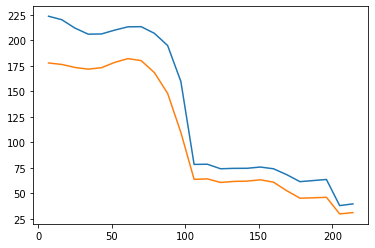

In [10]:
x = regres_result.num_obs
y = regres_result.RootMSErr
z = regres_result.MAE

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x, y)
plt.plot(x, z)

In [ ]:
X = Xset['time'].values.reshape(-1,1)

inicio = datetime.fromtimestamp(Xset['time'].values[-1]//1000)

print(inicio, X.shape)

In [ ]:
X = Xset['time'].values.reshape(-1,1)
len(X)

In [ ]:

X_fec = pd.date_range(inicio, periods=2*len(X), freq='1min')


In [ ]:
X_fec[-1]

In [ ]:
result = pd.read_pickle('../../simultrade/static/resultado.pkl')
result.shape

In [ ]:
pd.options.display.float_format = '{:.8f}'.format
result.loc[result.val_extrm.notna()].loc[result.last_extrm.notna()]

In [ ]:
result.loc[result.val_extrm.notna()]

In [ ]:
result.loc[result.last_extrm > 0]

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
import matplotlib.pyplot as plt


x = result.loc[result.last_extrm > 0]['time'][:10]
y = result.loc[result.last_extrm > 0]['val_extrm'][:10]

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x, y)

def calc_recta(x1, x2, y1, y2):

    m = ( y2 - y1 ) / ( x2 - x1 )
    b = y2 - (m * x2)
    return b, m

In [ ]:
# analisis de duracion de tendencia lineal de resultados


durac_lineal = result.loc[result.last_extrm > 0][['time', 'last_extrm']]

durac_lineal.time = durac_lineal.time.astype(int)

durac_lineal['durac'] = durac_lineal.time.diff()

durac_lineal['pendte'] = durac_lineal.last_extrm.diff() / durac_lineal.time.diff()

durac_lineal

In [ ]:
x = durac_lineal.pendte[1:]
y = durac_lineal.durac[1:]

fig = plt.figure()
ax = fig.add_subplot(111)

plt.scatter(x, y, s=5, color='g')

In [ ]:
for i, x in enumerate(durac_lineal.values):
    print(x[0])

In [ ]:
# maximos
result.loc[result.val_extrm > 0].loc[result.last_extrm > 0][['cross_cero','last_extrm']]

In [ ]:
# minimos
result.loc[result.val_extrm < 0].loc[result.last_extrm > 0][['cross_cero','last_extrm']]

In [20]:
class A:
    def __init__(self):
        self.asi = 20

class B(A):
    def __init__(self):
        self.te = 30



In [23]:
a = A()
print(a.asi)

b = B()
print(super().asi)


20


RuntimeError: super(): no arguments